# Introduction to Machine Learning 2
Na-Rae Han, 10/19/2019

General machine learning work flow:
1. Choose a class of model
2. Choose model hyperparameters
3. Fit the model to the training data ("training")
4. Use the model to predict labels for new data
    - If labels are known (test data, aka 'gold' data), evaluate the performance. 

### Three types of ML:
https://jakevdp.github.io/PythonDataScienceHandbook/05.01-what-is-machine-learning.html

1. Regression: predicting continuous values
2. Classification: predicting discrete labels
3. **Clustering: inferring labels on unlabeled data**  <-- This one below

In [1]:
# Turns on/off pretty printing 
%pprint

# Every returned Out[] is displayed, not just the last one. 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Pretty printing has been turned OFF


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn               # sklearn is the ML package we will use
import seaborn as sns        # seaborn graphical package

## Clustering: a type of unsupervised learning

- Using sklearn's pre-loaded data set "20 Newsgroups" 
- Code below is adapted from sklearn's official tutorial: 
  http://scikit-learn.org/stable/auto_examples/text/document_clustering.html 

Topic-based clustering is our goal:  
- Given a set of documents that are written on 4 topics, can they be grouped into 4 clusters? 

We will try **K-means clustering** method. 
- A good introduction article: https://www.datascience.com/blog/k-means-clustering
- sklearn's documentation: http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html

In [3]:
from sklearn import metrics
from sklearn.cluster import KMeans

In [4]:
# TfidfVectorizer is essentially CountVectorizer + TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

### Data preparation step

In [5]:
from sklearn.datasets import fetch_20newsgroups

# We will use the same 4 categories
cats = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']

# Not using train-test split. Because this is un-supervised! 
dataset = fetch_20newsgroups(subset='all', categories=cats, shuffle=True, random_state=12)

In [6]:
type(dataset)

<class 'sklearn.datasets.base.Bunch'>

In [7]:
dir(dataset)

['DESCR', 'data', 'description', 'filenames', 'target', 'target_names']

In [8]:
dataset.data[5]

'From: vis@world.std.com (Tom R Courtney)\nSubject: Re: Space Marketing would be wonderfull.\nOrganization: The World Public Access UNIX, Brookline, MA\nLines: 17\n\nIn some sense, I think that the folks who think the idea is wonderful, and the\nfolks who want to boycott anyone who has anything to do with this project are\nboth right.\n\nThat is, I think that space advertising is an interesting idea, and if someone\nwants to try it out, more power to them. However, a company may discover that\nthe cost of launch is not the only cost of advertising, and a company who \ngauged that ill will would lose them more revenue than the advertising would\ngain might decide to bow out of the project.\n\nI got incensed when I read that Carl Sagan called this idea an "abomination." \nI don\'t think that word means what he thinks it does. Children starving in the\nrichest country in the world is an abomination; an ad agency is at worst just\nin poor taste.\n\nTom Courtney\n\n'

In [9]:
dataset.target
dataset.target[5]
dataset.target_names

array([2, 1, 2, ..., 3, 3, 2], dtype=int64)

1

['comp.graphics', 'sci.space', 'soc.religion.christian', 'talk.religion.misc']

In [10]:
len(dataset.data)

3585

In [11]:
# In our case, WE KNOW TRUE VALUE OF K: 4 topics. 
# But in many real-life use cases, true number of clusters will not be known,
#  and user must experiment with different K values. 

true_k = np.unique(dataset.target).shape[0]
print(true_k)

4


In [12]:
# Ignore words found in over 50% of documents, ignore words found in just 1 document. 
# 1000 most frequent words, remove stop words. 
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, max_features=1000, stop_words='english')
X = vectorizer.fit_transform(dataset.data)

In [13]:
X[5]
print(X[5])
# 1x1000? "sparse matrix"? 

<1x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 31 stored elements in Compressed Sparse Row format>

  (0, 204)	0.0672523411448
  (0, 746)	0.105033387862
  (0, 180)	0.137895061559
  (0, 899)	0.318946488968
  (0, 826)	0.194510523256
  (0, 289)	0.0790109160299
  (0, 292)	0.0753453600121
  (0, 474)	0.0720597593222
  (0, 382)	0.117968021464
  (0, 711)	0.103870512588
  (0, 957)	0.0980917306138
  (0, 982)	0.271846319562
  (0, 697)	0.124447255719
  (0, 53)	0.118728321999
  (0, 923)	0.138473219002
  (0, 16)	0.124447255719
  (0, 787)	0.131302647881
  (0, 887)	0.313694855686
  (0, 429)	0.351672218256
  (0, 689)	0.265838807771
  (0, 449)	0.130831997331
  (0, 959)	0.153887024417
  (0, 909)	0.119059351145
  (0, 671)	0.12915907751
  (0, 216)	0.297109201319
  (0, 235)	0.280127897997
  (0, 495)	0.14325935292
  (0, 160)	0.116086406394
  (0, 977)	0.120763749157
  (0, 553)	0.122679382187
  (0, 60)	0.155757332972


In [14]:
vectorizer.vocabulary_.get('space')
vectorizer.get_feature_names()[204]
vectorizer.get_feature_names()[180]

826

'com'

'children'

### Data preparation complete. Time to apply K-means

In [15]:
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1, verbose=True)
km.fit(X)

Initialization complete
Iteration  0, inertia 6341.331
Iteration  1, inertia 3344.916
Iteration  2, inertia 3325.413
Iteration  3, inertia 3323.131
Iteration  4, inertia 3321.900
Iteration  5, inertia 3320.349
Iteration  6, inertia 3318.211
Iteration  7, inertia 3316.019
Iteration  8, inertia 3314.004
Iteration  9, inertia 3312.786
Iteration 10, inertia 3312.295
Iteration 11, inertia 3312.004
Iteration 12, inertia 3311.687
Iteration 13, inertia 3311.505
Iteration 14, inertia 3311.395
Iteration 15, inertia 3311.294
Iteration 16, inertia 3311.206
Iteration 17, inertia 3311.178
Iteration 18, inertia 3311.154
Iteration 19, inertia 3311.140
Iteration 20, inertia 3311.125
Iteration 21, inertia 3311.115
Iteration 22, inertia 3311.103
Iteration 23, inertia 3311.090
Iteration 24, inertia 3311.082
Converged at iteration 24: center shift 0.000000e+00 within tolerance 9.553371e-08


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=4, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=True)

In [16]:
# A bunch of metrics that compare target labels and labels as assigned by KM. 
print("Homogeneity: %0.3f" % metrics.homogeneity_score(dataset.target, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(dataset.target, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(dataset.target, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(dataset.target, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

Homogeneity: 0.475
Completeness: 0.488
V-measure: 0.481
Adjusted Rand-Index: 0.365
Silhouette Coefficient: 0.015


In [17]:
# Top terms ("features") as ranked by centroids
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Top terms per cluster:
Cluster 0: com article university just don know like posting cs host
Cluster 1: space nasa henry access digex toronto pat gov alaska shuttle
Cluster 2: god jesus people christ christians sin christian bible believe church
Cluster 3: graphics image thanks file university files posting host nntp ac


In [18]:
km.labels_[:20]        # Cluster labels as assigned by KMeans
dataset.target[:20]    # These are the real target labels
dataset.target_names

array([2, 1, 0, 1, 2, 1, 2, 0, 3, 3, 2, 1, 0, 2, 0, 3, 2, 0, 0, 3])

array([2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 3, 2, 0, 3, 2, 3, 0], dtype=int64)

['comp.graphics', 'sci.space', 'soc.religion.christian', 'talk.religion.misc']

### Round 2. Let's try 3 clusters this time. 

In [19]:
km2 = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1, verbose=True)
km2.fit(X)

Initialization complete
Iteration  0, inertia 6525.727
Iteration  1, inertia 3360.637
Iteration  2, inertia 3339.043
Iteration  3, inertia 3335.716
Iteration  4, inertia 3335.152
Iteration  5, inertia 3335.015
Iteration  6, inertia 3334.943
Iteration  7, inertia 3334.900
Iteration  8, inertia 3334.871
Iteration  9, inertia 3334.843
Iteration 10, inertia 3334.822
Iteration 11, inertia 3334.794
Iteration 12, inertia 3334.783
Iteration 13, inertia 3334.774
Iteration 14, inertia 3334.763
Iteration 15, inertia 3334.758
Iteration 16, inertia 3334.755
Iteration 17, inertia 3334.751
Iteration 18, inertia 3334.749
Iteration 19, inertia 3334.744
Iteration 20, inertia 3334.736
Converged at iteration 20: center shift 0.000000e+00 within tolerance 9.553371e-08


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=True)

In [20]:
print("Top terms per cluster:")
order_centroids = km2.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(3):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()
# Are the clusters looking better? 
# CAVEAT: could be local optimum, re-run to change

Top terms per cluster:
Cluster 0: space nasa access henry digex gov pat toronto alaska com
Cluster 1: god jesus com people christian church bible christians christ don
Cluster 2: com graphics university posting host nntp thanks image computer know


In [21]:
km2.labels_[:20]        # Cluster labels as assigned by KMeans
dataset.target[:20]     # These are the real target labels
dataset.target_names

array([1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 2])

array([2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 3, 2, 0, 3, 2, 3, 0], dtype=int64)

['comp.graphics', 'sci.space', 'soc.religion.christian', 'talk.religion.misc']

In [22]:
# Newsgroup label -> KM label. Will need to adjust. 
labelmap = {0:1, 1:0, 2:2, 3:2}

target_conv = [labelmap[x] for x in dataset.target]
target_conv[:20]

[2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1]

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_conv, km2.labels_)
cm

array([[ 730,   10,  247],
       [   9,    3,  961],
       [   6, 1336,  283]])

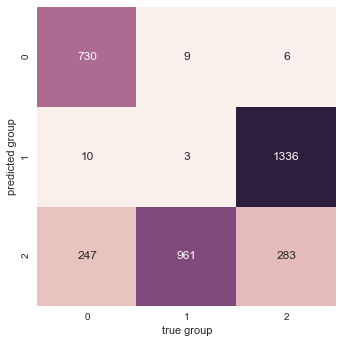

In [24]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true group')
plt.ylabel('predicted group')
plt.show()

### Question: Can we produce nifty clustering visuals
such as the ones in tutorial/documentation: 
- https://www.datascience.com/blog/k-means-clustering
- http://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_iris_004.png

??

Answer: **NO**. The examples deal with 2 and 3 dimensions(features) respectively, and therefore can be mapped in 2- and 3-dimensions. Our model involves 1000 (!) dimensions, therefore impossible to plot that way. Handling language data often involves HUGE dimensions, coming from individual lexical items each of which constitutes its own feature dimension. 

### Too Many Dimensions?
This is where **PCA** (**Principal Component Analysis**) comes in. PCA is a method for reducing dimensions; it identifies dimensions/features that are not predictive and therefore can be discarded in model building. 
- Textbook chapter: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

Suppose you have a spreadsheet of people's age, years of experience, years of education, zip code, gender, height, weight, shoe size, favorite color, and finally their salary. In predicting someone's salary, which features will be most predictive and which the least (or not at all)? PCA identifies the latter, helping to reduce dimensions in your model. 

### Testing on new, made up examples

In [25]:
tests = ['sending a payload to the ISS', 'I met Santa Claus once']
preds = km2.predict(tests)
print(preds)
#??? Error? Why? 

ValueError: could not convert string to float: 'sending a payload to the ISS'

In [26]:
tests = ['sending a payload to the ISS space astronaut earth orbit', 
         'pray jesus I met Santa Claus once']
tests_tfidf = vectorizer.transform(tests)    # Yep, need this step
preds = km2.predict(tests_tfidf)
print(preds)

[0 1]
